<a href="https://colab.research.google.com/github/bysandychoi/RL_2022_edu/blob/main/Q_Learning_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

먼저 실습에 필요한 library들을 설치합니다.

In [ ]:
!pip install gym==0.22 pyvirtualdisplay pygame
!apt-get install -y xvfb python-opengl ffmpeg

Visualization을 위한 코드입니다.

<div class="markdown-google-sans">
  <h1>Colab이란?</h1>
</div>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다. 
- 구성이 필요하지 않음
- 무료로 GPU 사용
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하세요.


In [ ]:
import glob
import io
import base64

from gym.wrappers import Monitor
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

# play recorded video
def show_video():
    # start virtual display
    
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''
            <video alt="test" autoplay loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

# OpenAI Gym
OpenAI에서는 다양한 강화학습 알고리즘 코드나 환경들을 제공합니다.

OpenAI Gym은 강화학습 환경의 표준적인 Baseline을 제공합니다. 또한 여러가지 sample 환경들을 제공합니다.

이외에도 다양한 환경들이 gym style에 맟춰서 개발되므로 이에 맟춰서 코드를 작성해 하나의 알고리즘으로 다양한 환경에서 실험할 수 있습니다.

https://www.gymlibrary.dev/

이번 실습은 Gym FrozenLake 환경에서 진행합니다. 

해당 환경은 아래와 같은 그림으로 설계되어있는 환경입니다. Agent가 출발지에서 시작하여 구멍을 피해 빙판길을 걸으면서 최종 목적지까지 가게 하는 것이 이번 환경에서의 목표입니다.

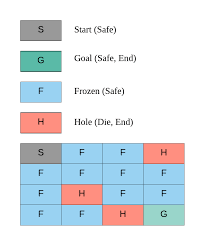

# FrozenLake
다음은 FrozenLake 환경에서 Agent에게 주어지는 정보들에 대해 알아보겠습니다. 아래 그림은 앞써 이론 시간에 배운 강화학습의 구조도 입니다. 

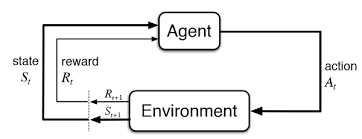

그림에서 보시면 알 수 있듯이 agent를 학습 시키기 위해는 state, reward, action이라는 3가지 정보가 필요합니다. Frozen Lake환경에서 해당 3가지 정보가 어떻게 구성되어있는지 알아보겠습니다.

### State
FrozenLake는 4x4 환경에서 진행됩니다. Agent가 존재 할 수 있는 16가지 위치가 state가 됩니다.

### Action
FrozenLake의 Action은 상하좌우로 움직일 수 있습니다.

### Reward
마지막으로 reward 입니다. 목적지에 도달하면 1점을, 이외에는 0점을 얻습니다.

본격적으로 시작하기 전에 FrozenLake-v1 환경에서 랜덤한 액션을 하는 에이전트를 실행시켜 봅시다.


먼저 환경 오브젝트를 생성합니다. gym.make(환경이름)을 사용합니다.

env.observation_space는 환경의 state와 관련된 정보를 가진 오브젝트입니다.

env.action_space는 환경의 action과 관련된 정보를 가진 오브젝트입니다. 

In [ ]:
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)

print(env.observation_space) # 4 x 4 Grid 중 위치
print(env.action_space) 

Discrete(16)
Discrete(4)


env.reset은 환경을 초기화하고 첫 state를 반환합니다.

env.render은 환경을 visualize 해주는 함수입니다.

env.action_space.sample는 action_space의 랜덤한 action을 반환합니다.

env.step(action)은 해당 action을 환경에서 실행하고, obs, reward, done, info값을 받아옵니다.



Observation은 다음 state를 나타냅니다. (State t+1)

Reward는 action을 통해 얻은 보상입니다.

Done은 현제 환경이 끝났는지 여부를 알려줍니다.

Info는 부가적인 정보를 담은 dict입니다. 대부분 학습에 사용되지 않습니다.

In [ ]:
from time import sleep
import gym

def random_episode(env):
    #env.reset() -> reset environment and returns the initial state
    state = env.reset() ###
    done = False
    step_count = 0
    while not done:
        #env.action_space.sample() -> returns random value within the action space
        action = env.action_space.sample() ###
        #env.step(action) -> do action in environment, returns next state, reward, done, and extra values
        next_state, reward, done, info = env.step(action) ###
        #set to next state
        state = next_state ###

        #env.render() -> visualizes the environment
        env.render(mode='rgb_array')###

        
        step_count += 1
        if step_count > 10:
            break
    env.close()
    show_video()

env = gym.make('FrozenLake-v1', is_slippery=False)
env = Monitor(env, './video', force=True)
random_episode(env)

# Q Learning
본격적으로 q learning으로 학습하는 에이전트를 살펴 봅시다.

$$ Q({\small state}, {\small action}) \leftarrow (1 - \alpha) Q({\small state}, {\small action}) + \alpha \Big({\small reward} + \gamma \max_{a} Q({\small next \ state}, {\small all \ actions})\Big) $$

Q Learning에서는 Agent의 Exploration을 위해 epsilon-greedy policy를 사용합니다.

epsilon의 확률(낮은 확률)로 랜덤한 행동을 하고, 이외의 경우 q_table[state] 에서 가장 기댓값이 높은 액션을 하게 됩니다.

 Q Learning 코드를 확인해봅시다

In [ ]:
import gym
import random
import numpy as np

from IPython.display import clear_output
from time import sleep

#Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)

#Algorithm parameters: step size alpha, small epsilon
epsilon = 0.1
alpha = 0.1
gamma = 0.99
#Initialize Q(s, a), for all (s, a)
q_table = np.ones([env.observation_space.n, env.action_space.n]) ###

#Train function
def train(env, q_table, train_steps, target_score):
    #Values for debugging
    episode_num = 0
    reward_sum = 0
    total_steps = 0

    #Loop for each episode
    while total_steps < train_steps: ###
        #Print average score every 100 episode
        episode_num += 1
        if episode_num % 100 == 0:
            clear_output(wait=True)
            print(f'{episode_num} ep : {reward_sum / 100}')
            if target_score <= reward_sum / 100:
                break
            reward_sum = 0

        #Initialize S
        state = env.reset() ###
        done = False      

        #Loop for each step of episode until S is terminal
        while not done: ###
            total_steps += 1
            #Choose A from S using policy derived from Q (e.g., epsilon-greedy)
            if random.random() > epsilon: ###
                #Best Action
                action = np.argmax(q_table[state]) ###
            else:
                #Random Action
                action = env.action_space.sample() ###

            #Take action A, observe S', R, done
            next_state, reward, done, info = env.step(action) ###
            reward_sum += reward

            #Q(S, A) <- Q(S, A) + alpha*[R + gamma * (1-done) * max a Q(S', a) - Q(S, A)]
            q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * (1-done) * np.max(q_table[next_state])) ###
            #S <- S'
            state = next_state ###

    #Print total steps to learn
    print(f'Total steps: {total_steps}')

#Run train
train(env, q_table, 200000, 0.9)

300 ep : 0.91
Total steps: 2456


학습한 에이전트를 테스트 할 때에는 최선의 선택만을 하도록 합니다.

env.render을 통해 잘 학습되었는지 visualize합니다.

마지막으로 에피소드 100회 평균으로 평가해 봅니다.

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=False)
env = Monitor(env, './video', force=True)

def test(env, q_table, visualize=False, step_limit=500):
    state = env.reset()
    reward_sum = 0
    step_count = 0
    done = False
    while not done: ###
        step_count += 1
        if step_count > step_limit:
            break
        
        #No epsilon-greedy
        action = np.argmax(q_table[state]) ###

        #Take step in environment
        state, reward, done, info = env.step(action) ###

        reward_sum += reward
        if visualize:
            env.render(mode='rgb_array')
    
    env.close()
    if visualize:
        show_video()
        
    return reward_sum

score_viz = test(env, q_table, visualize=True)
print(score_viz)
reward_tot = 0
for _ in range(100):
    reward_tot += test(env, q_table)
print(reward_tot / 100)

같은 알고리즘을 Slippery FrozenLake에서 돌려봅시다.

is_slippery=True로 한 FrozenLake는 이동 시 2/3 확률로 이동 방향이 왼쪽이나 오른쪽으로 바뀝니다.

기존 환경보다 어려운 non-deterministic한 환경입니다.

목표 점수를 0.45로 낮추어서 학습합니다.

In [ ]:
#Create environment
env = gym.make("FrozenLake-v1", is_slippery=True)
q_table = np.ones([env.observation_space.n, env.action_space.n])
train(env, q_table, 800000, 0.45)

3700 ep : 0.46
Total steps: 109751


In [ ]:
#Visualize trained agent
env = gym.make("FrozenLake-v1", is_slippery=True)
env = Monitor(env, './video', force=True)


score_viz = test(env, q_table, visualize=True)
print(score_viz)
reward_tot = 0
for _ in range(100):
    reward_tot += test(env, q_table)
print(reward_tot / 100)

Q Table을 visualize 하여 어떤 식으로 학습됐는지 확인해 봅시다.

주변 구멍의 반대 방향으로 이동하도록 학습된 모습을 확인할 수 있습니다.

In [ ]:
dirs = ['◁','▽','▷','△']
for row in range(4):
    txt = ''
    for col in range(4):
        #Printing the direction of maximum Q value
        txt += dirs[np.argmax(q_table[row*4+col])]
    print(txt)

◁△△△
◁◁◁◁
△▽◁◁
◁▷▽◁


In [ ]:
dirs = ['◁','▽','▷','△']
for row in range(4):
    txt = ''
    for col in range(4):
        #Printing the direction of maximum Q value
        txt = txt + " " + str( q_table[row*4+col] )
    print(txt)

 [0.95065818 0.95187724 0.95189591 0.95136885] [0.95873847 0.59049    0.96094012 0.96079877] [0.96810859 0.97038754 0.97020995 0.9696502 ] [0.97000549 0.729      0.96953487 0.97050136]
 [0.95995309 0.96111824 0.59049    0.9585264 ] [1. 1. 1. 1.] [0.729      0.98011283 0.59049    0.97741321] [1. 1. 1. 1.]
 [0.9704913  0.6561     0.9706033  0.96823556] [0.97763126 0.98025777 0.98026612 0.531441  ] [0.98605407 0.99000007 0.6561     0.98317762] [1. 1. 1. 1.]
 [1. 1. 1. 1.] [0.729      0.98826472 0.99001997 0.98887134] [0.99407433 0.9959049  1.         0.9901866 ] [1. 1. 1. 1.]


# Custom Gym Environment
이번 실습에서는 새로운 환경을 직접 만들어보도록 합니다.

구상할 환경은 로봇이 물건을 들어서 목적지까지 운반하는 것이 목표입니다.

로봇은 좌, 우로 회전하거나 전진할 수 있습니다. 최소한의 회전, 이동으로 물건을 운송 할 수 있는 로봇을 학습시켜 봅시다.

차근차근 TransportRobot environment의 state, action, reward를 설계해 봅시다.


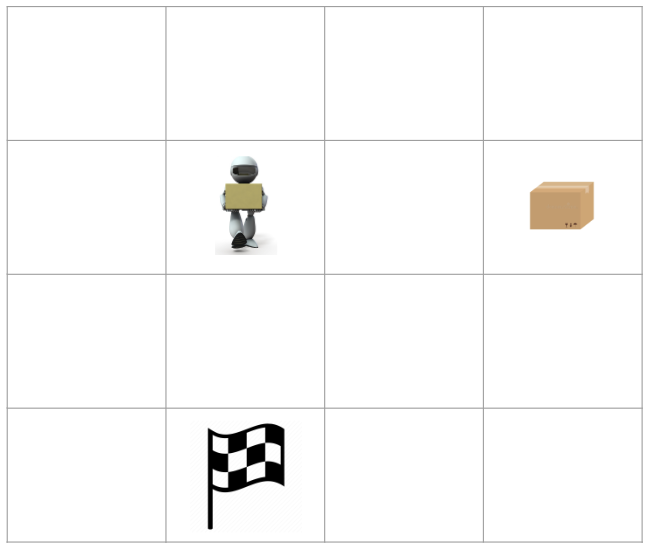

### State

로봇은 FrozenLake와 비슷하게 4x4 gridworld에서 진행합니다.

필요한 정보는 로봇의 위치, 로봇이 향하는 방향, 물건을 들고 있는지 여부, 물건의 위치, 목적지의 위치입니다.

### Action
5가지 액션을 정의하고 이에 대응하는 코드를 step(action) 함수에 설계합니다.

Num | Action
--- | ---
0 | Move forward
1 | Turn left
2 | Turn right
3 | Pick up object
4 | Put down object

### Reward
최대한 빠르게 운송하는 것이 목표이기 때문에 매 스텝마다 -1의 reward를 줍니다.

운송을 완료한 경우에만 episode가 종료됩니다.

Reward를 원하는 목적에 맞도록 잘 설계해야 합니다.

## TransportRobotEnv 구현
위 3가지를 염두에 두면서 init, reset, step 함수를 구현합니다.

init 함수에선 state를 저장할 변수들을 선언합니다.

reset 함수에선 변수들을 초기화 합니다. random 모듈을 이용하여 매번 랜덤하게 시작합니다.

step 함수에선 환경에서 에이전트가 action을 행했을 때 변한 state를 구하고 reward, done을 반환합니다.

어느 프로그램이든 디버깅은 굉장히 중요합니다. 마지막으로 render 함수를 구현해서 환경이 잘 작동하는지 쉽게 시각적으로 확인할 수 있도록 합니다.


In [ ]:
import gym
import random
import numpy as np

from IPython.display import clear_output
from time import sleep

#Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)

#Algorithm parameters: step size alpha, small epsilon
epsilon = 0.1
alpha = 0.1
gamma = 0.99
#Initialize Q(s, a), for all (s, a)
q_table = np.ones([env.observation_space.n, env.action_space.n]) ###

#Train function
def train(env, q_table, train_steps, target_score):
    #Values for debugging
    episode_num = 0
    reward_sum = 0
    total_steps = 0

    #Loop for each episode
    while total_steps < train_steps: ###
        #Print average score every 100 episode
        episode_num += 1
        if episode_num % 100 == 0:
            clear_output(wait=True)
            print(f'{episode_num} ep : {reward_sum / 100}')
            if target_score <= reward_sum / 100:
                break
            reward_sum = 0

        #Initialize S
        state = env.reset() ###
        done = False      

        #Loop for each step of episode until S is terminal
        while not done: ###
            total_steps += 1
            #Choose A from S using policy derived from Q (e.g., epsilon-greedy)
            if random.random() > epsilon: ###
                #Best Action
                action = np.argmax(q_table[state]) ###
            else:
                #Random Action
                action = env.action_space.sample() ###

            #Take action A, observe S', R, done
            next_state, reward, done, info = env.step(action) ###
            reward_sum += reward

            #Q(S, A) <- Q(S, A) + alpha*[R + gamma * (1-done) * max a Q(S', a) - Q(S, A)]
            q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * (1-done) * np.max(q_table[next_state])) ###
            #S <- S'
            state = next_state ###

    #Print total steps to learn
    print(f'Total steps: {total_steps}')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
class TransportRobotEnv(gym.Env):
    def __init__(self):
        self.dir = 0 #0 Left, 1 Up, 2 Right, 3 Down
        self.iscarry = 0 #0 No, 1 Yes
        self.grid_size = 4
        self.x = 0
        self.y = 0
        self.object_x = 0
        self.object_y = 0
        self.target_x = 0
        self.target_y = 0
        
        self.step_count = 0
        self.prev_action = 0
        
        #State consists of following : directions, is_carryning_object, x, y, object x, object y, target x, target y
        self.observation_space = [4, 2, self.grid_size, self.grid_size, self.grid_size, self.grid_size, self.grid_size, self.grid_size] 
        #5 actions : move forward, turn left, turn right, pick up, put down
        self.action_space = gym.spaces.Discrete(5) ###
        self.action_names = ['Move', 'Turn left', 'Turn right', 'Pick up', 'Put down']

    def get_obs(self):
        return (self.dir, self.iscarry, self.x, self.y, self.object_x, self.object_y, self.target_x, self.target_y)

    def reset(self):
        self.dir = random.randint(0, 3)
        self.iscarry = 0
        self.x = random.randint(0, self.grid_size-1) 
        self.y = random.randint(0, self.grid_size-1)
        self.object_x = random.randint(0, self.grid_size-1)
        self.object_y = random.randint(0, self.grid_size-1)
        self.target_x = random.randint(0, self.grid_size-1)
        self.target_y = random.randint(0, self.grid_size-1)

        self.step_count = 0
        return self.get_obs()

    def step(self, action):
        self.step_count += 1
        self.prev_action = action

        reward = -1
        done = False
        
        #5 actions
        #Move forward
        if action == 0:
            if self.dir == 0 and self.x < self.grid_size-1:
                self.x += 1
            elif self.dir == 1 and self.y < self.grid_size-1:
                self.y += 1
            elif self.dir == 2 and self.x > 0:
                self.x -= 1
            elif self.dir == 3 and self.y > 0:
                self.y -= 1
        #Turn left
        elif action == 1:
            self.dir = (self.dir+1)%4
        #Turn right
        elif action == 2:
            self.dir = (self.dir+3)%4
        #Pick up object
        elif action == 3:
            if self.iscarry == 0 and self.x == self.object_x and self.y == self.object_y:
                self.iscarry = 1
        #Put down object
        elif action == 4:
            if self.iscarry == 1:
                self.iscarry = 0
        
        if self.iscarry == 1:
            self.object_x = self.x
            self.object_y = self.y
        #If object is delivered successfully, end environment
        if self.object_x == self.target_x and self.object_y == self.target_y and self.iscarry == 0:
            done = True

        return self.get_obs(), reward, done, {}

    # Rendering is very important for debugging
    def render(self):
        print(f'Step {self.step_count}')
        if self.iscarry == 0:
            robot_shape = ['▷', '△', '◁', '▽']
        else:
            robot_shape = ['▶', '▲', '◀', '▼']
        
        for y in reversed(range(self.grid_size)):
            line = ''
            for x in range(self.grid_size):
                if x == self.x and y == self.y:
                    line += robot_shape[self.dir]
                elif self.iscarry == 0 and x == self.object_x and y == self.object_y:
                    line += '●'
                elif x == self.target_x and y == self.target_y:
                    line += '◎'
                else:
                    line += '□'
            print(line)
        print(self.action_names[self.prev_action])

환경이 잘 작동하는지 random agent로 실행해봅시다.

In [ ]:
env = TransportRobotEnv()

state = env.reset()
done = False
step_count = 0
while not done:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    state = next_state #next state

    print(f'obs: {next_state}')
    print(f'reward: {reward}')
    print(f'done: {done}')
    print(f'info: {info}')
    env.render()
    
    sleep(0.5)
    clear_output(wait=True)
    step_count += 1
    if step_count > 10:
        break

obs: (2, 0, 3, 3, 3, 3, 2, 1)
reward: -1
done: False
info: {}
Step 11
□□□◁
□□□□
□□◎□
□□□□
Turn right


구현한 Q Learning 함수로 RobotEnv를 학습해 봅시다.

In [ ]:
env = TransportRobotEnv()
q_table = np.zeros([*env.observation_space, env.action_space.n])
train(env, q_table, 5000000, -9)

300 ep : -2403.69


점수가 원하는 목표까지 도달하지 못했음을 확인할 수 있습니다.

Visualization을 통해 어떤 문제가 있는지 확인합시다.

In [ ]:
from IPython.display import clear_output

def viz_and_test(env, q_table):
    def test_custom(env, q_table, visualize=False, step_limit=500):
        state = env.reset()
        reward_sum = 0
        step_count = 0
        done = False
        while not done:
            step_count += 1
            if step_count > step_limit:
                break
            
            #No epsilon-greedy
            action = np.argmax(q_table[state])
            state, reward, done, info = env.step(action)

            reward_sum += reward
            if visualize:
                clear_output(wait=True)
                env.render()
                sleep(0.5)

        return reward_sum
    
    score_viz = test_custom(env, q_table, visualize=True, step_limit=20)
    print(score_viz)
    reward_tot = 0
    fail_count = 0
    for _ in range(100):
        score = test_custom(env, q_table)
        if score > -100:
            reward_tot += score
        else:
            fail_count += 1
    print(f'Success rate: {1 - fail_count/100}')
    print(f'Average score: {reward_tot / (100-fail_count)}')

viz_and_test(env, q_table)

NameError: ignored

학습이 잘 되지 않아 올바르지 않은 행동을 반복하는 모습을 확인 할 수 있습니다.

이 문제를 해결하기 위해 Reward Shaping을 도입해 봅시다.

# Reward Shaping
Reward를 수정하여 에이전트가 더 쉽게 학습할 수 있도록 설계하는 것을 reward shaping이라고 합니다.

Train 함수를 수정하여 reward shaping을 진행해 봅시다.

예시로 운반에 성공했을 경우 reward를 추가로 10을 얻도록 변경합니다.

In [ ]:
import numpy as np
import gym

#Train function
def train_reward_shape(env, q_table, train_steps, target_score):
    episode_num = 0
    reward_sum = 0
    total_steps = 0

    while total_steps < train_steps:
        episode_num += 1
        if episode_num % 100 == 0:
            clear_output(wait=True)
            print(f'{episode_num} ep : {reward_sum / 100}')
            if target_score <= reward_sum / 100:
                break
            reward_sum = 0

        #Initialize S
        state = env.reset()
        done = False

        while not done:
            total_steps += 1
            if random.random() > epsilon:
                action = np.argmax(q_table[state])
            else:
                action = env.action_space.sample()

            next_state, reward, done, info = env.step(action)
            reward_sum += reward

            #Reward Shaping here: Shape reward only for q_table
            if done:
                reward += 10
            elif state[1] == 1 and next_state[1] == 0:
                reward -= 5
            elif state[1] == 0 and next_state[1] == 1:
                reward += 5
            elif state == next_state: 
                reward -= 5
            #Shaping done;
            
            q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * (1-done) * np.max(q_table[next_state]))
            state = next_state

    print(f'Total steps: {total_steps}')

env = TransportRobotEnv()
q_table = np.zeros([*env.observation_space, env.action_space.n])
train_reward_shape(env, q_table, 5000000, -10)

65300 ep : -9.91
Total steps: 1244142


In [ ]:
viz_and_test(env, q_table)

Step 8
□△□□
□□□□
□□□□
□□□□
Put down
-8
Success rate: 0.92
Average score: -9.445652173913043


#Cartpole-v0

마찰이 없는 카트 위에 있는 막대기를 오랜 시간 넘어뜨리지 않는 것이 목표로

연속적인 state를 가지고 있는 환경입니다.
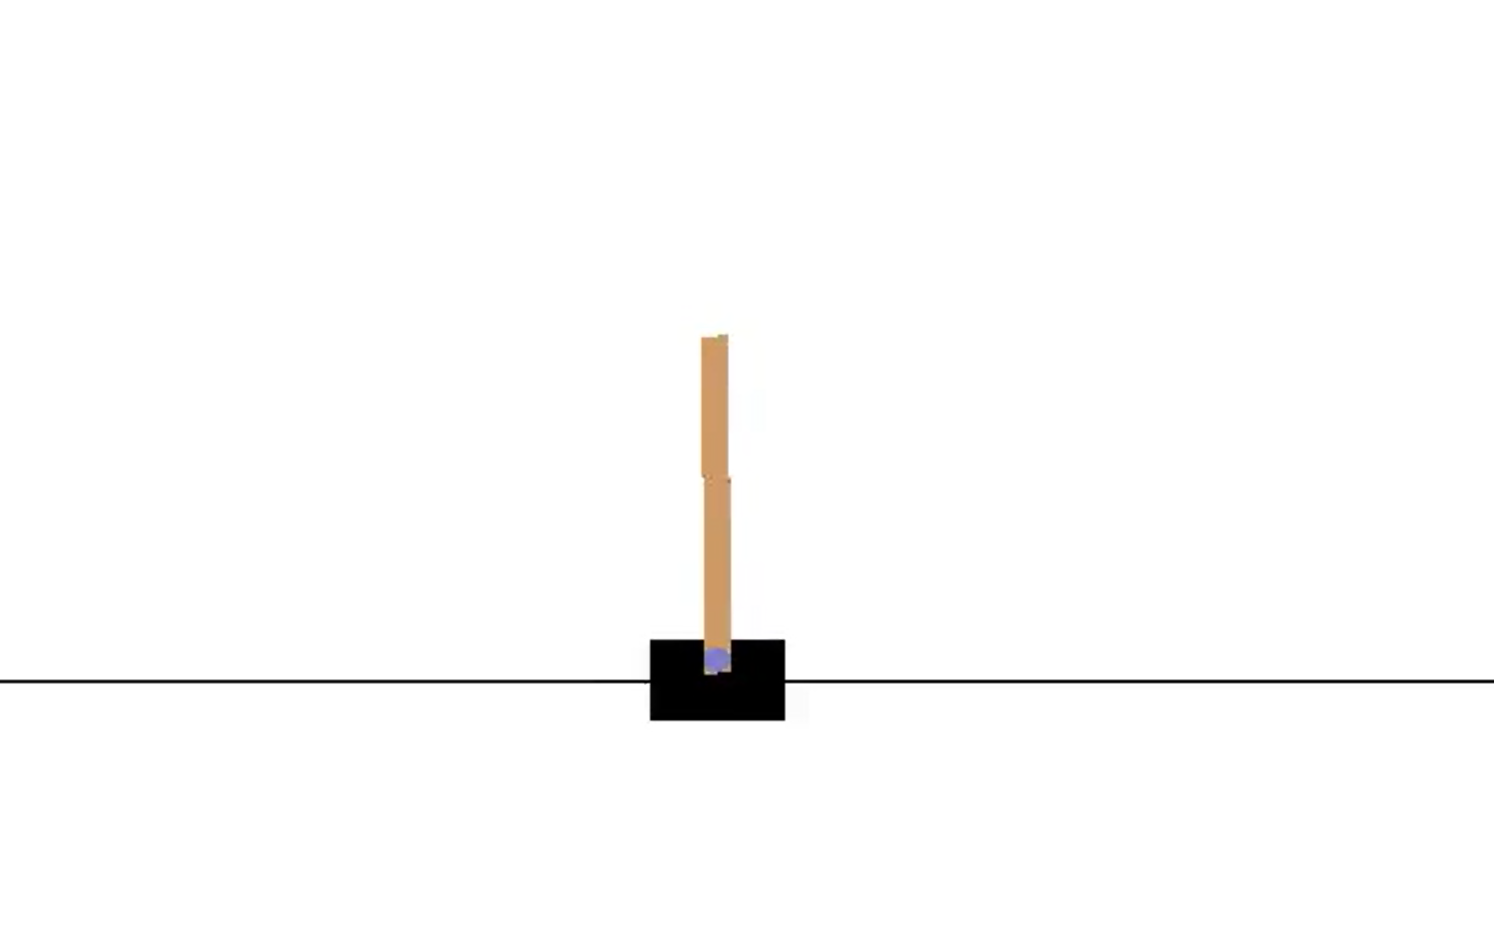


## 종료조건
- 카트가 중심에서 너무 멀 경우
- 12도 이상 막대기가 기울어진 경우
= 시간 스텝이 200 이상


## State
- 카트 위치
- 카트 속도
- 막대 각
- 막대 각속도


## Action
- 오른쪽으로 카트 밀기
- 왼쪽으로 카트 밀기


## Reward
- 살아있는 매 step 마다 +1


In [ ]:
env = gym.make('CartPole-v1')
env = Monitor(env, './video', force=True)

print(env.observation_space)

print(env.action_space) 

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Discrete(2)


In [ ]:
random_episode(env)

Q Learning은 Table을 만들어야 하기 때문에 무한한 값을 가지는 연속적인 state는 처리할 수 없습니다.

각 4개의 state의 연속적인 값을 7개의 구간으로 나누어 이산화하여 사용해 봅시다.

In [ ]:
from gym.envs.classic_control import CartPoleEnv
from gym.spaces import Discrete
from gym import register

class DiscreteCartpole(CartPoleEnv):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.bin_size = 7
        self.observation_space = Discrete(self.bin_size**4)
    
    def discretize_state(self, state):
        discrete_state = 0
        state[0] *= 100
        state[2] *= 10
        for value in state:
            d_v = int((value+1)*self.bin_size/2)
            if d_v < 0:
                d_v = 0
            elif d_v >= self.bin_size:
                d_v = self.bin_size-1
            discrete_state *= self.bin_size
            discrete_state += d_v
        return discrete_state

    def reset(self):
        state = super().reset()
        return self.discretize_state(state) ###

    def step(self, action):
        state, reward, done, info = super().step(action) ###
        return self.discretize_state(state), reward, done, info ###

register(
    id='DiscreteCartpole-v0',
    entry_point='__main__:DiscreteCartpole',
    max_episode_steps=200,
)

env = gym.make('DiscreteCartpole-v0')
env = Monitor(env, './video', force=True)

print(env.observation_space)

print(env.action_space) 

random_episode(env)

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment DiscreteCartpole-v0
  logger.warn(f"Overriding environment {id}")


Discrete(2401)
Discrete(2)


이전에 구현한 Q Learning 알고리즘으로 학습을 시키고 결과를 확인합니다.


In [ ]:
env = DiscreteCartpole()
q_table = np.zeros([env.observation_space.n, env.action_space.n]) ###
# Maximum score is 200
train(env, q_table, 5000000, 150) ###

NameError: ignored

In [ ]:
test_env = gym.make('DiscreteCartpole-v0')
test_env = Monitor(test_env, './video', force=True)
test(test_env, q_table, visualize=True)

Exception ignored in: <function Monitor.__del__ at 0x7f9a172a0050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gym/wrappers/monitor.py", line 288, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/gym/wrappers/monitor.py", line 185, in close
    self._close_video_recorder()
  File "/usr/local/lib/python3.7/dist-packages/gym/wrappers/monitor.py", line 269, in _close_video_recorder
    self.video_recorder.close()
  File "/usr/local/lib/python3.7/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 160, in close
    os.remove(self.path)
FileNotFoundError: [Errno 2] No such file or directory: '/content/video/openaigym.video.19.4099.video000000.mp4'
Exception ignored in: <function VideoRecorder.__del__ at 0x7f9a17295c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 193, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist

185.0

지금까지 배운 Q Learrning은 여러가지 문제의 정답을 잘 구하는 모습을 보였지만,

state와 action 공간의 크기에 큰 영향을 받고, 조금만 커져도 학습이 잘 안되는 모습을 확인할 수 있었습니다.

다음 시간에는 Deep Learning을 활용한 Deep Q Learning을 시작으로, 

Table 기반이 아닌 Deep Reinforcement Learning을 통해 이러한 공간적인 제약을 해결하고, 훨씬 더 어렵고 복잡한 문제들로 scope를 넓힙니다.